In [1]:
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0
tr_x = tr_x.T
te_x = te_x.T

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)



# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
te_y = te_y.T
print ("Shape of testing labels ", te_y.shape)

2.1.0
Shape of training features  (784, 60000)
Shape of test features  (784, 10000)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


In [3]:

tr_x = tf.cast(tr_x, tf.float32) 
te_x = tf.cast(te_x, tf.float32)
tr_y = tf.cast(tr_y, tf.float32)
te_y = tf.cast(te_y, tf.float32)

In [4]:

w1 = tf.Variable(tf.random.normal(shape=[784,300], mean=0.0, stddev=0.05))
w2 = tf.Variable(tf.random.normal(shape=[300,100], mean=0.0, stddev=0.05))
w3 = tf.Variable(tf.random.normal(shape=[100,10], mean=0.0, stddev=0.05))
b = tf.Variable([0.])
   

In [5]:

def forwardPass(x, w1,w2, w3, b):
    w1 = tf.transpose(w1)
    w2 = tf.transpose(w2)
    w3 = tf.transpose(w3)
     
    y_pred = tf.matmul(w1, x) + b 
    a1 = tf.maximum(y_pred, 1) 
    
    y_pred = tf.matmul(w2, a1) + b 
    a2 = tf.maximum(y_pred, 1) 
    
    y_pred = tf.matmul(w3, a2) + b
    return softmax(y_pred)


In [6]:

def softmax(y_pred):
    y_pred_exp = tf.math.exp(y_pred)
    summation = tf.reduce_sum(y_pred_exp, 0, keepdims=True) 
    return y_pred_exp / summation 



In [7]:
def cross_entropyL1(y_true, y_pred, factor = 0.01):
    m = 3
    y_pred = tf.clip_by_value(y_pred, 1e-10, 1.0)
    regularlization = 0
    loss_per_classes = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=0)
    regularlization = (factor/2) * (  tf.reduce_sum(tf.abs(w1))+  tf.reduce_sum(tf.abs(w2)) + tf.reduce_sum(tf.abs(w2)))
    return tf.reduce_mean(loss_per_classes+regularlization)

In [8]:
def cross_entropyL2(y_true, y_pred, factor=0.01):
    y_pred = tf.clip_by_value(y_pred, 1e-10, 1.0)
    loss_per_classes = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=0)
    regularlization = (factor/2 ) * (  tf.reduce_sum(tf.square(w1))+  tf.reduce_sum(tf.square(w2)) + tf.reduce_sum(tf.square(w3)))
    return tf.reduce_mean(loss_per_classes+regularlization)

In [9]:

def calculate_accuracy(x, y, w1,w2,w3, b):
  
  y_pred_softmax = forwardPass(x,w1,w2,w3, b)
  predictions_correct = tf.cast(tf.equal(tf.round(y_pred_softmax), y), tf.float32)
  return tf.reduce_mean(predictions_correct),y_pred_softmax

In [10]:
def trainModelL1(num_Iterations = 50):
   
    trainingLosses= []
    testLosses= []
    trainingAccuracies = []
    testAccuracies = []
    
    for i in range(num_Iterations):
      
      with tf.GradientTape() as tape:
        y_pred = forwardPass(tr_x,w1,w2,w3, b)
        currentLoss = cross_entropyL1(tr_y, y_pred)
      
      gradients = tape.gradient(currentLoss, [w1,w2,w3, b])
        
     
      tr_accuracy, y_pred_softmax = calculate_accuracy(tr_x, tr_y, w1,w2,w3, b)
      te_accuracy, y_pred_softmax = calculate_accuracy(te_x, te_y, w1,w2,w3, b)
      te_currentLoss = cross_entropyL1(te_y, y_pred_softmax)
    
      # Appending and print the information for training instances
      trainingAccuracies.append(tr_accuracy.numpy())
      trainingLosses.append(currentLoss.numpy())
      print ("Iteration ", i, ": train_loss = ",currentLoss.numpy(), "  train_acc: ", tr_accuracy.numpy())
      
      # Appending and print the information for validation instances
      testLosses.append(te_currentLoss.numpy())
      testAccuracies.append(te_accuracy.numpy())
      print ("Iteration ", i, ": test_loss = ",te_currentLoss.numpy(), "  test_acc: ", te_accuracy.numpy())
      print("*"*60)
    
      #Calling Adam optimizer the for updating the weights and trainfing the data
      tf.keras.optimizers.Adam(learning_rate=0.001).apply_gradients(zip(gradients, [w1,w2,w3,b])) 
        
    
    plt.style.use("ggplot") 
    plt.figure()
    plt.plot(testLosses, label="Val Loss")
    plt.plot(trainingLosses, label="Train Loss")
    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(testAccuracies, label="Val Acc")
    plt.legend()
    plt.show()
    

Iteration  0 : train_loss =  61.164623   train_acc:  0.9
Iteration  0 : test_loss =  61.16504   test_acc:  0.9
************************************************************
Iteration  1 : train_loss =  59.693024   train_acc:  0.9
Iteration  1 : test_loss =  59.693386   test_acc:  0.9
************************************************************
Iteration  2 : train_loss =  58.25135   train_acc:  0.9
Iteration  2 : test_loss =  58.251724   test_acc:  0.9
************************************************************
Iteration  3 : train_loss =  56.83924   train_acc:  0.9
Iteration  3 : test_loss =  56.83958   test_acc:  0.9
************************************************************
Iteration  4 : train_loss =  55.453785   train_acc:  0.9
Iteration  4 : test_loss =  55.454155   test_acc:  0.9
************************************************************
Iteration  5 : train_loss =  54.096725   train_acc:  0.9
Iteration  5 : test_loss =  54.09706   test_acc:  0.9
****************************

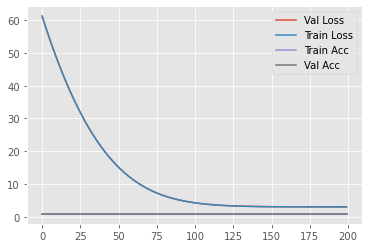

In [11]:
trainModelL1(200)

In [67]:
def trainModelL2(num_Iterations = 50):
   
    trainingLosses= []
    testLosses= []
    trainingAccuracies = []
    testAccuracies = []
    
    for i in range(num_Iterations):
      
      with tf.GradientTape() as tape:
        y_pred = forwardPass(tr_x,w1,w2,w3, b)
        currentLoss = cross_entropyL2(tr_y, y_pred)
      
      gradients = tape.gradient(currentLoss, [w1,w2,w3, b])
        
     
      tr_accuracy, y_pred_softmax = calculate_accuracy(tr_x, tr_y, w1,w2,w3, b)
      te_accuracy, y_pred_softmax = calculate_accuracy(te_x, te_y, w1,w2,w3, b)
      te_currentLoss = cross_entropyL2(te_y, y_pred_softmax)
    
      # Appending and print the information for training instances
      trainingAccuracies.append(tr_accuracy.numpy())
      trainingLosses.append(currentLoss.numpy())
      print ("Iteration ", i, ": train_loss = ",currentLoss.numpy(), "  train_acc: ", tr_accuracy.numpy())
      
      # Appending and print the information for validation instances
      testLosses.append(te_currentLoss.numpy())
      testAccuracies.append(te_accuracy.numpy())
      print ("Iteration ", i, ": test_loss = ",te_currentLoss.numpy(), "  test_acc: ", te_accuracy.numpy())
      print("*"*60)
    
      #Calling Adam optimizer the for updating the weights and trainfing the data
      tf.keras.optimizers.Adam(learning_rate=0.001).apply_gradients(zip(gradients, [w1,w2,w3,b])) 
        
    
    plt.style.use("ggplot") 
    plt.figure()
    plt.plot(testLosses, label="Val Loss")
    plt.plot(trainingLosses, label="Train Loss")
    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(testAccuracies, label="Val Acc")
    plt.legend()
    plt.show()
    

Iteration  0 : train_loss =  5.738605   train_acc:  0.9
Iteration  0 : test_loss =  5.7387276   test_acc:  0.9
************************************************************
Iteration  1 : train_loss =  5.594483   train_acc:  0.9
Iteration  1 : test_loss =  5.5945864   test_acc:  0.9
************************************************************
Iteration  2 : train_loss =  5.470128   train_acc:  0.9
Iteration  2 : test_loss =  5.4702773   test_acc:  0.9
************************************************************
Iteration  3 : train_loss =  5.354712   train_acc:  0.9
Iteration  3 : test_loss =  5.354824   test_acc:  0.9
************************************************************
Iteration  4 : train_loss =  5.249103   train_acc:  0.9
Iteration  4 : test_loss =  5.2492404   test_acc:  0.9
************************************************************
Iteration  5 : train_loss =  5.1488075   train_acc:  0.9
Iteration  5 : test_loss =  5.148954   test_acc:  0.9
******************************

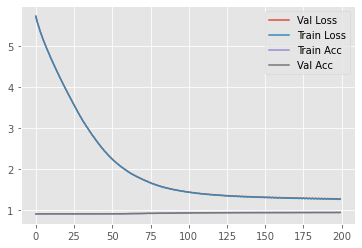

In [117]:
trainModelL2(200)